## Pyber Observations


* Based on this limited dataset, rural areas have the lowest percentage of drivers per city type (2.6%), but have the highest amount of rides per driver (1.6) and hightest amount of fares per ride ($34.62).


* Suburban areas are in the middle of three city types in regards percentage of drivers per city type (16.5%), but similar to rural, have a postive ratio of rides per driver (1.3) and moderate amount of fares per ride ($30.97)


* Urban areas are oversaturated with drivers as there are more drivers (2,405) than rides provided (1,625) giving them the lowest ratio or rides per driver (0.7).



In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
all_df = pd.merge(ride_df, city_df, on="city", how="inner")

# For refrence, get record counts
#print(len(city_df)) #  120 records
#print(len(ride_df)) # 2375 records 
#print(len(all_df))  # 2375 records 

# Show combined data (for initial coding purposes)
#all_df.head()

In [2]:
# create dataset for each city and type with counts of rides and average fares
city_grp = all_df.groupby(["city", "type", "driver_count"]) \
                  .agg({"ride_id":"count", "fare":"mean"}) \
                  .rename(columns={"ride_id":"cnt_ride", "fare":"avg_fare"}) \
                  .reset_index()

# assign basic min/max values to variables for x/y axis limits (used later on)
max_ride = city_grp["cnt_ride"].max()
max_fare = city_grp["avg_fare"].max()
min_fare = city_grp["avg_fare"].min()

# Show city group data (for initial coding purposes)
#city_grp.head()

## Bubble Plot of Ride Sharing Data

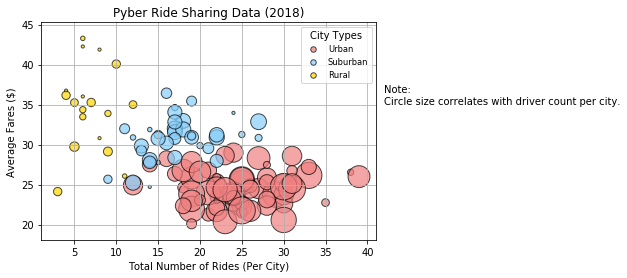

<Figure size 432x288 with 0 Axes>

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_df = city_grp.loc[city_grp["type"] == "Urban", ["cnt_ride", "avg_fare", "driver_count"]]
suburban_df = city_grp.loc[city_grp["type"] == "Suburban", ["cnt_ride", "avg_fare", "driver_count"]]
rural_df = city_grp.loc[city_grp["type"] == "Rural", ["cnt_ride", "avg_fare", "driver_count"]]

# Build the scatter plots for each city types
plt.scatter(urban_df["cnt_ride"], urban_df["avg_fare"], s=urban_df["driver_count"]*10, marker="o", alpha=0.7, facecolors="lightcoral", edgecolors="black", linewidths=1, label="Urban")
plt.scatter(suburban_df["cnt_ride"], suburban_df["avg_fare"], s=suburban_df["driver_count"]*10, marker="o", alpha=0.7, facecolors="lightskyblue", edgecolors="black", linewidths=1, label="Suburban")
plt.scatter(rural_df["cnt_ride"], rural_df["avg_fare"], s=rural_df["driver_count"]*10, marker="o", alpha=0.7, facecolors="gold", edgecolors="black", linewidths=1, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.xlim(1, max_ride + 2)
plt.ylim(min_fare - 2, max_fare + 2)
plt.grid()

# Create a legend
lgnd = plt.legend(title="City Types", loc="upper right", fontsize='small')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,36.5, "Note:", wrap=True)
plt.text(42,35, "Circle size correlates with driver count per city.", wrap=True)

# Show Figure
plt.show()

# Save Figure
plt.savefig("data/scatter_rides_x_fares.png")


## Total Fares by City Type

In [4]:
# all three pie charts are based on city type
#   
#   create one merged dataset to allow for simple visibility, maintenance and creation of all three charts
#

# create groupby against complete dataset with aggregates for rides and fares
type_oth_grp = all_df.groupby(["type"]) \
                     .agg({"ride_id":"count", "fare":"sum"}) \
                     .rename(columns={"ride_id":"ride_cnt", "fare":"fare_sum"}) \
                     .reset_index()

# create groupby against city data set with aggregate for driver count
type_drv_grp = city_df.groupby(["type"]) \
                      .agg({"driver_count":"sum"}) \
                      .rename(columns={"driver_count":"driver_cnt"}) \
                      .reset_index()

# create new data set merging the two groups together based on city type
type_grp = pd.merge(type_oth_grp, type_drv_grp, on="type" )

# show group data (for initial coding purposes)
#type_grp.head()

In [5]:
# enrich dataset by adding calculated columns so that all values needed by charts are available and dynamic
type_grp["ride_all"]   = type_grp["ride_cnt"].sum()
type_grp["fare_all"]   = type_grp["fare_sum"].sum()
type_grp["driver_all"] = type_grp["driver_cnt"].sum()
type_grp["ride_pct"]   = type_grp["ride_cnt"] / type_grp["ride_all"] * 100
type_grp["fare_pct"]   = type_grp["fare_sum"] / type_grp["fare_all"] * 100
type_grp["driver_pct"] = type_grp["driver_cnt"] / type_grp["driver_all"] * 100
type_grp["color"] = ""
type_grp["explode"] = 0.0
type_grp["display_order"] = 0
type_grp.set_index("type", inplace=True)

# show group data (for initial coding purposes)
#type_grp.head()

In [6]:
# inject colors / explode / display order into data set
type_grp.at["Urban", "color"] = "lightcoral"
type_grp.at["Urban", "explode"] = 0.1
type_grp.at["Urban", "display_order"] = 1
type_grp.at["Rural", "color"] = "gold"
type_grp.at["Rural", "display_order"] = 2
type_grp.at["Suburban", "color"] = "lightskyblue"
type_grp.at["Suburban", "display_order"] = 3

# resort based on custom display order
type_grp.sort_values(["display_order"], ascending=True, inplace=True)
type_grp.reset_index(inplace=True)

# show group data (for initial coding purposes)
#type_grp.head()


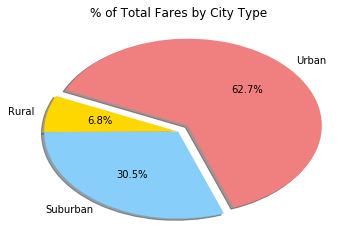

<Figure size 432x288 with 0 Axes>

In [7]:
# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(type_grp["fare_pct"], explode=type_grp["explode"], labels=type_grp["type"], colors=type_grp["color"],
        autopct="%1.1f%%", shadow=True, startangle=290)
plt.show()

# Save Figure
plt.savefig("data/pie1_by_fares.png")

## Total Rides by City Type

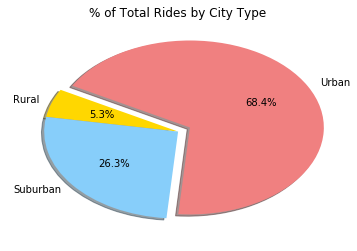

<Figure size 432x288 with 0 Axes>

In [8]:
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(type_grp["ride_pct"], explode=type_grp["explode"], labels=type_grp["type"], colors=type_grp["color"],
        autopct="%1.1f%%", shadow=True, startangle=265)
plt.show()

# Save Figure
plt.savefig("data/pie2_by_rides.png")

## Total Drivers by City Type

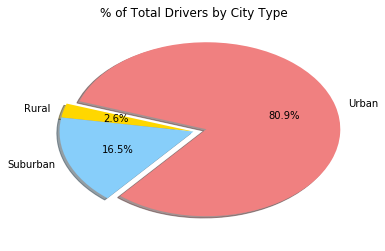

<Figure size 432x288 with 0 Axes>

In [9]:
# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(type_grp["driver_pct"], explode=type_grp["explode"], labels=type_grp["type"], colors=type_grp["color"],
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.show()

# Save Figure
plt.savefig("data/pie3_by_drivers.png")